In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.options.display.max_columns = 100
pd.options.display.max_rows = None

#Make the sheet width 100%
from IPython.core.display import display, HTML
display(HTML("<style>.container {width:100% !important;}</style>" ))

%matplotlib inline

In [ ]:
df_train = []

for i in range(1,9):
    df = pd.read_csv(f'https://raw.githubusercontent.com/asreddyIITB/santander/main/data/train/train.csv_split_{i}.csv')
    df_train.append(df)
df_train = pd.concat(df_train)

In [ ]:
df_test = []

for i in range(1,9):
    df = pd.read_csv(f'https://raw.githubusercontent.com/asreddyIITB/santander/main/data/test/test.csv_split_{i}.csv')
    df_test.append(df)
df_test = pd.concat(df_test)

In [ ]:
df_train['target'].value_counts()

0    179902
1     20098
Name: target, dtype: int64

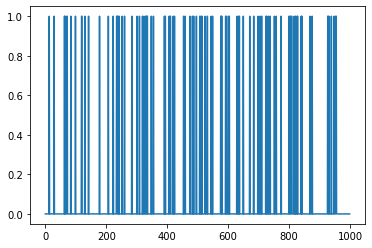

In [ ]:
df_train.head(1000)['target'].plot()

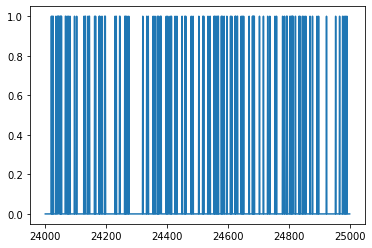

In [ ]:
df_train.tail(1000)['target'].plot()

In [ ]:
df_train.set_index('ID_code', inplace=True)

In [ ]:
df_train.describe()

,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,var_10,var_11,var_12,var_13,var_14,var_15,var_16,var_17,var_18,var_19,var_20,var_21,var_22,var_23,var_24,var_25,var_26,var_27,var_28,var_29,var_30,var_31,var_32,var_33,var_34,var_35,var_36,var_37,var_38,var_39,var_40,var_41,var_42,var_43,var_44,var_45,var_46,var_47,var_48,...,var_150,var_151,var_152,var_153,var_154,var_155,var_156,var_157,var_158,var_159,var_160,var_161,var_162,var_163,var_164,var_165,var_166,var_167,var_168,var_169,var_170,var_171,var_172,var_173,var_174,var_175,var_176,var_177,var_178,var_179,var_180,var_181,var_182,var_183,var_184,var_185,var_186,var_187,var_188,var_189,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
count,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,...,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000
mean,0.100490,10.679914,-1.627622,10.715192,6.796529,11.078333,-5.065317,5.408949,16.545850,0.284162,7.567236,0.394340,-3.245596,14.023978,8.530232,7.537606,14.573126,9.333264,-5.696731,15.244013,12.438567,13.290894,17.257883,4.305430,3.019540,10.584400,13.667496,-4.055133,-1.137908,5.532980,5.053874,-7.687740,10.393046,-0.512886,14.774147,11.434250,3.842499,2.187230,5.868899,10.642131,0.662956,-6.725505,9.299858,11.222356,11.569954,8.948289,-12.699667,11.326488,-12.471737,14.704713,...,16.817671,10.141542,7.633199,16.727902,6.974955,-2.074128,13.209272,-4.813552,17.914591,10.223282,24.259300,5.633293,5.362896,11.002170,-2.871906,19.315753,2.963335,-4.151155,4.937124,5.636008,-0.004962,-0.831777,19.817094,-0.677967,20.210677,11.640613,-2.799585,11.882933,-1.014064,2.591444,-2.741666,10.085518,0.719109,8.769088,12.756676,-3.983261,8.970274,-10.335043,15.377174,0.746072,3.234440,7.438408,1.927839,3.331774,17.993784,-0.142088,2.303335,8.908158,15.870720,-3.326537
std,0.300653,3.040051,4.050044,2.640894,2.043319,1.623150,7.863267,0.866607,3.418076,3.332634,1.235070,5.500793,5.970253,0.190059,4.639536,2.247908,0.411711,2.557421,6.712612,7.851370,7.996694,5.876254,8.196564,2.847958,0.526893,3.777245,0.285535,5.922210,1.523714,0.783367,2.615942,7.965198,2.159891,2.587830,4.322325,0.541614,5.179559,3.119978,2.249730,4.278903,4.068845,8.279259,5.938088,0.695991,0.309599,5.903073,21.404912,2.860511,10.579862,11.384332,...,2.464157,3.962426,3.005373,2.014200,4.961678,5.771261,0.955140,5.570272,7.885579,4.122912,10.880263,0.217938,1.419612,5.262056,5.457784,5.024182,0.369684,7.798020,3.105986,0.369437,4.424621,5.378008,8.674171,5.966674,7.136427,2.892167,7.513939,2.628895,8.579810,2.798956,5.261243,1.371862,8.963434,4.474924,9.318280,4.725167,3.189759,11.574708,3.944604,0.976348,4.559922,3.023272,1.478423,3.992030,3.135162,1.

In [ ]:
df_train_corr = df_train.corr()

In [ ]:
important_features = df_train_corr['target'].abs().sort_values(ascending=False).head(11).to_frame().drop(['target'], axis=0).index.values.tolist()

In [ ]:
important_features

['var_81',
 'var_139',
 'var_12',
 'var_6',
 'var_110',
 'var_146',
 'var_53',
 'var_26',
 'var_76',
 'var_174']

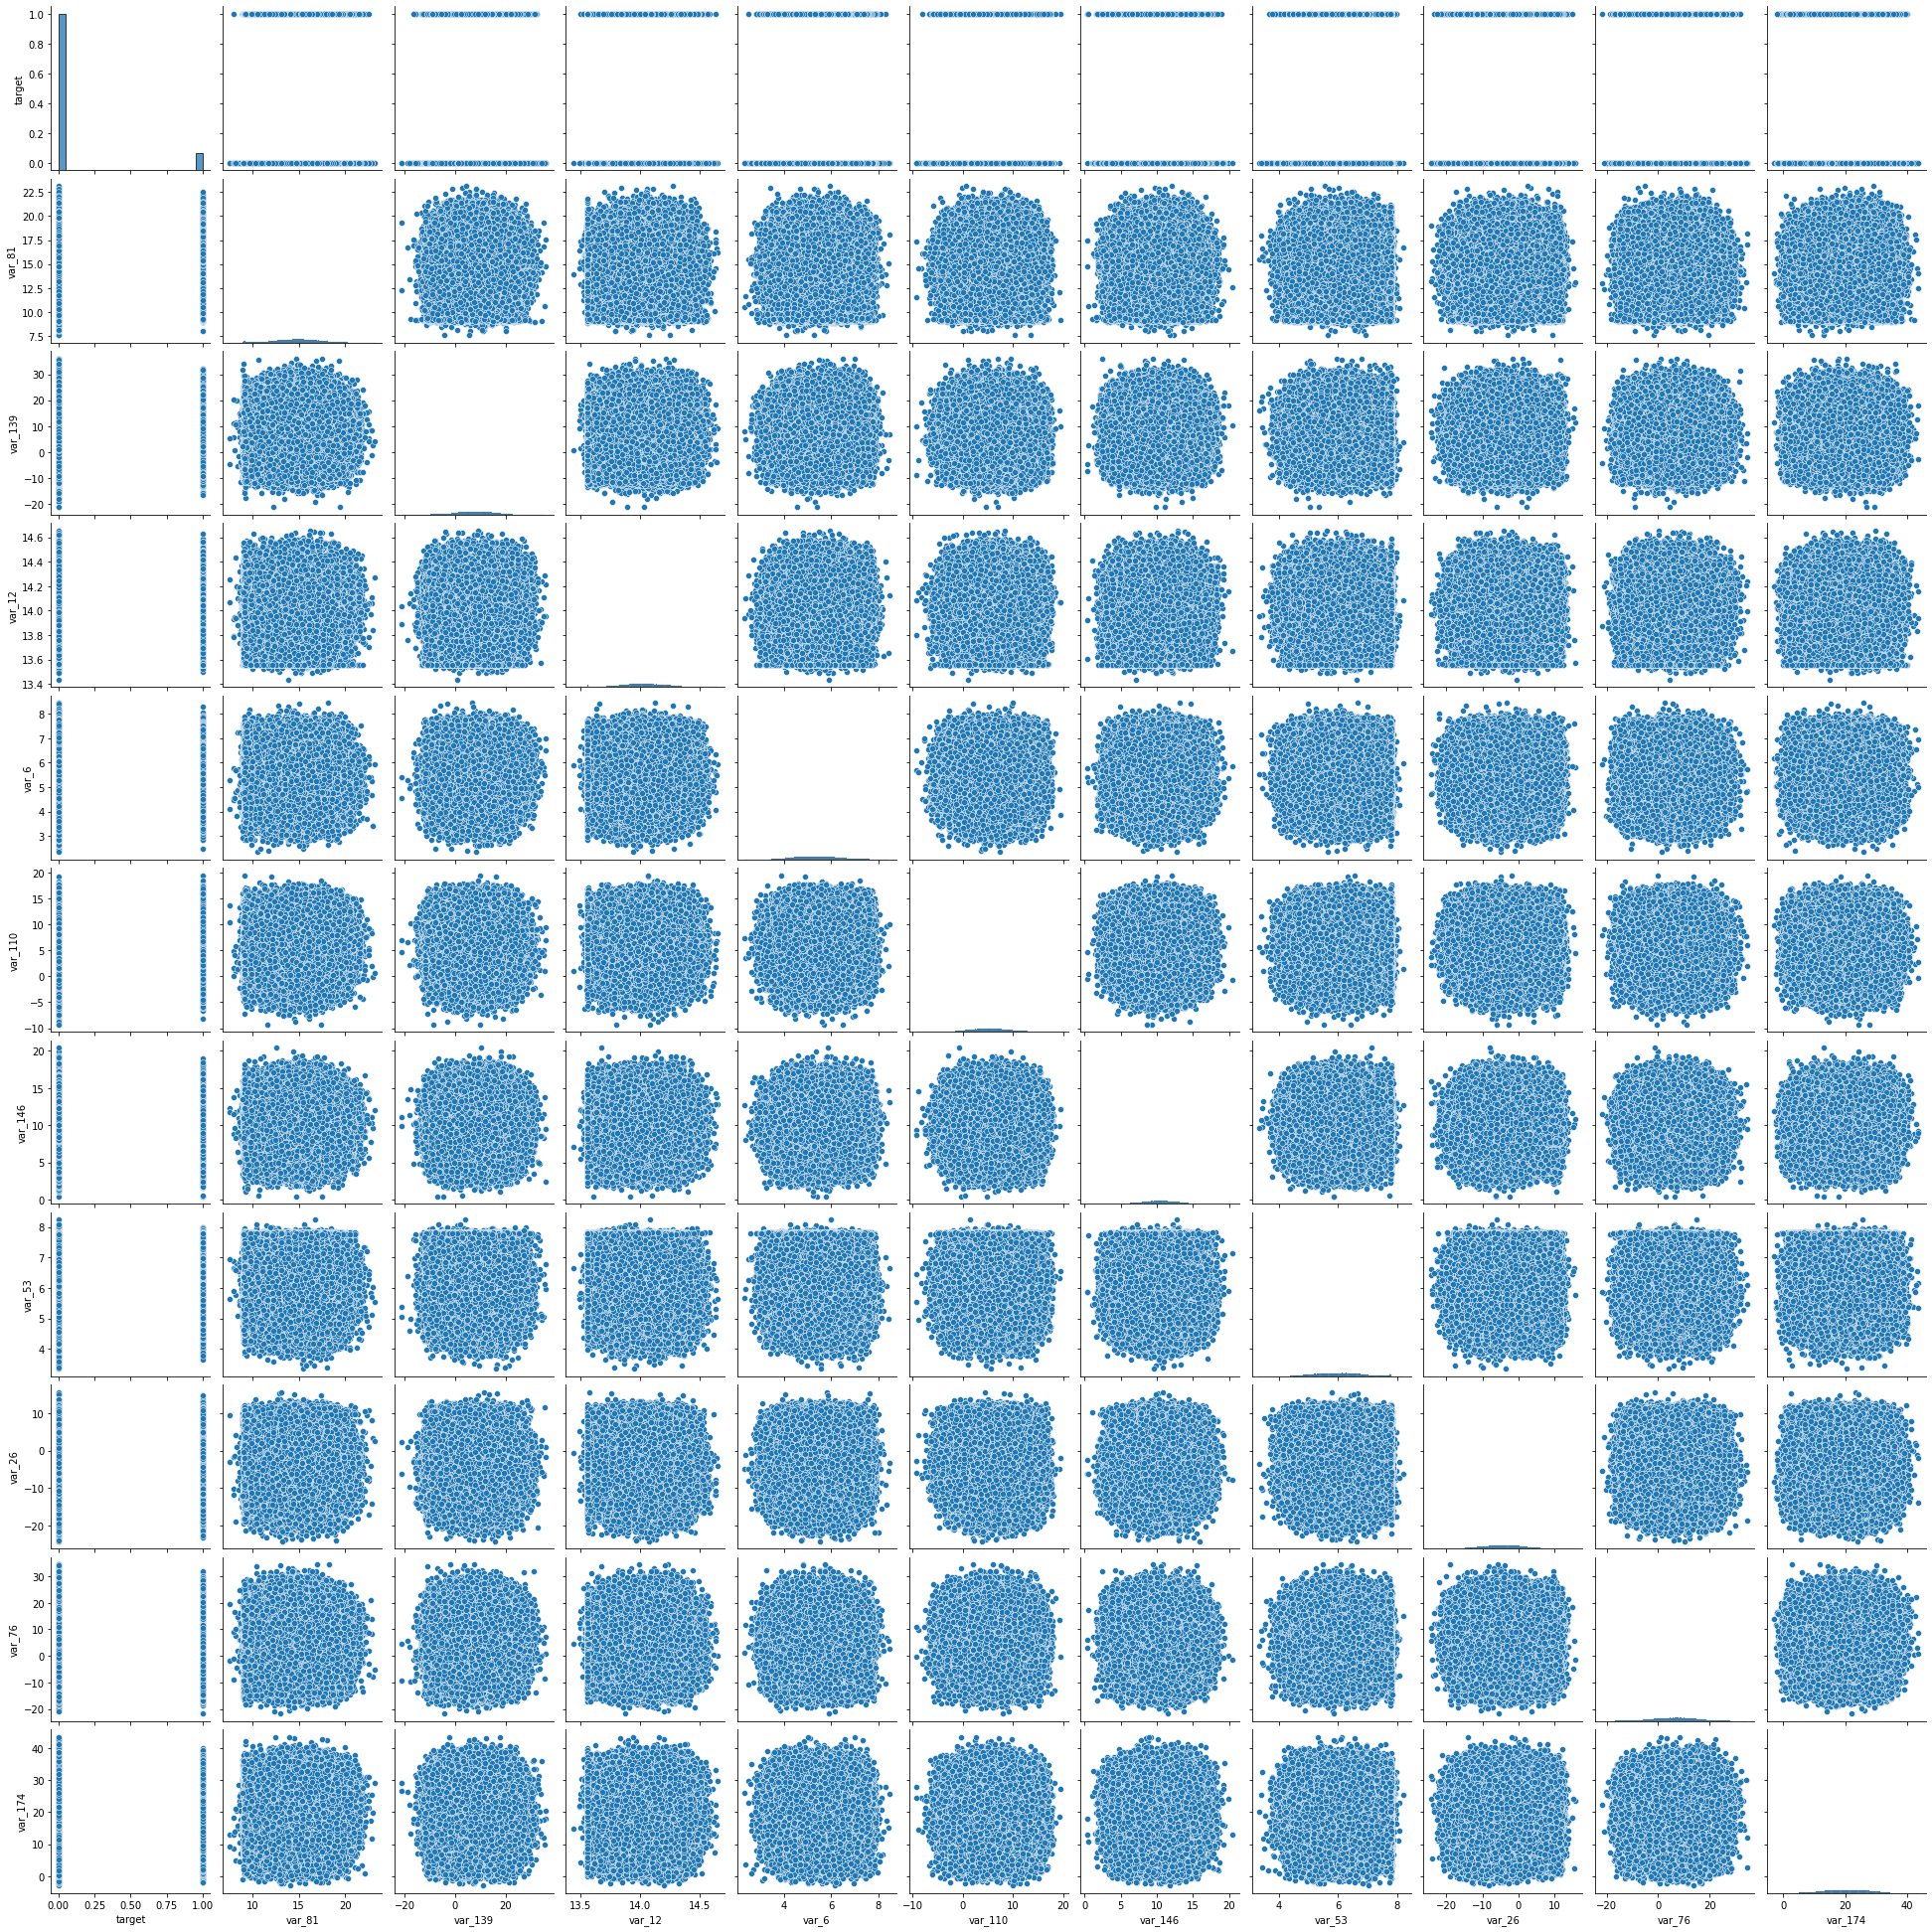

In [ ]:
sns.pairplot(df_train[['target'] + important_features])

## Data Processing

1.   Create Test/Train Data
2.   Normalize Data

In [ ]:
X = df_train.drop(['target'], axis=1)
Y = df_train['target']

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=42, train_size=0.7)

# **Model 2: Light GBM**


In [ ]:
import lightgbm as lgb
from sklearn.metrics import roc_auc_score


In [ ]:
colsToRemove = []
for col in df_train.columns:
    if col != 'ID' and col != 'target':
        if df_train[col].std() == 0: 
            colsToRemove.append(col)

In [ ]:
print(f"Number of constant columns: {len(colsToRemove)}")

Number of constant columns: 0


In [ ]:
train_data = lgb.Dataset(X_train, label=Y_train)
test_data = lgb.Dataset(X_test, label=Y_test)

parameters = {'objective': 'binary',
              'metric': 'auc',
              'is_unbalance': 'true',
              'boosting': 'gbdt',
              'num_leaves': 63,
              'feature_fraction': 0.5,
              'bagging_fraction': 0.5,
              'bagging_freq': 20,
              'learning_rate': 0.01,
              'verbose': -1
             }

model_lgbm = lgb.train(parameters,
                            train_data,
                            valid_sets=test_data,
                            num_boost_round=5000,
                            early_stopping_rounds=50)

y_test_pred = model_lgbm.predict(X_test)

print("AUC: {:.4f}".format(roc_auc_score(Y_test, y_test_pred)))

[1]	valid_0's auc: 0.656993
Training until validation scores don't improve for 50 rounds.
[2]	valid_0's auc: 0.691541
[3]	valid_0's auc: 0.707519
[4]	valid_0's auc: 0.721447
[5]	valid_0's auc: 0.724363
[6]	valid_0's auc: 0.730313
[7]	valid_0's auc: 0.740863
[8]	valid_0's auc: 0.744937
[9]	valid_0's auc: 0.754398
[10]	valid_0's auc: 0.75969
[11]	valid_0's auc: 0.763478
[12]	valid_0's auc: 0.766092
[13]	valid_0's auc: 0.768324
[14]	valid_0's auc: 0.771288
[15]	valid_0's auc: 0.774209
[16]	valid_0's auc: 0.775225
[17]	valid_0's auc: 0.775526
[18]	valid_0's auc: 0.776082
[19]	valid_0's auc: 0.776344
[20]	valid_0's auc: 0.777331
[21]	valid_0's auc: 0.779146
[22]	valid_0's auc: 0.78196
[23]	valid_0's auc: 0.782806
[24]	valid_0's auc: 0.783393
[25]	valid_0's auc: 0.785221
[26]	valid_0's auc: 0.78647
[27]	valid_0's auc: 0.789046
[28]	valid_0's auc: 0.789785
[29]	valid_0's auc: 0.790228
[30]	valid_0's auc: 0.791201
[31]	valid_0's auc: 0.791945
[32]	valid_0's auc: 0.79358
[33]	valid_0's auc: 0.7